# 第1章 神经网络复习

整个第一章应该是很熟悉的，但是又明确了很多重要的事情

我们快速过一遍

## 数学和Python复习

### 向量和矩阵

#### 向量矩阵与张量

![](./img/图1-1.png)

左边向量，右边矩阵

矩阵有行row，有列column

如图为3*2的矩阵

扩展到N维，为张量

#### 列向量与行向量

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
    
注意！！
    
意有两种方式表示向量
    
- 一种是在垂直方向上排列（列向量）的方法
- 另一种是在水平方向上排列（行向量）的方法

![](./img/图1-2.png)

在数学和深度学习等许多领域，向量一般作为列向量处理。

不过，考虑到实现层面的一致性，本书将向量作为行向量处理（每次都会注明是行向量）。

Python实现中，行向量是 1*N

#### 向量矩阵与标量的字符表示

此外，在数学式中写向量或矩阵时，会用  **x** 或 **W** 等粗体表示，以将它们与单个元素（标量）区分开。

在源代码中，会用 x 或 W 这样的字体表示。

#### numpy生成

In [1]:
import numpy as np

In [2]:
# 生成向量
x = np.array([1, 2, 3])
x.__class__ # 输出类名

numpy.ndarray

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [5]:
# 生成矩阵
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [6]:
W.ndim

2

### 矩阵的对应元素的运算

重点区分对应元素运算与之后的内积运算

In [7]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

In [8]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [9]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### 广播

In [10]:
 A = np.array([[1, 2], [3, 4]])

In [11]:
A * 10

array([[10, 20],
       [30, 40]])

![](./img/图1-3.png)

In [12]:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

![](./img/图1-4.png)

像这样，因为 NumPy 有广播功能，所以可以智能地执行不同形状的数组之间的运算

### 向量内积和矩阵乘积

x = (x1, ··· , xn)和y = (y1, ··· , yn)两个向量

$$x · y = x_1y_1 + x_2y_2 + ··· + x_ny_n$$

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

向量内积直观地表示了“两个向量在多大程度上指向同一方向”。

如果限定向量的大小为 1，当两个向量完全指向同一方向时，它们的向量内积是 1。
    
反之，如果两个向量方向相反，则内积为 −1

In [13]:
# 向量内积
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

32

矩阵乘积

![](./img/图1-5.png)

In [14]:
# 矩阵乘积
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

如上所示，向量内积和矩阵乘积中都使用了 np.dot()。

当 np.dot(x, y)的参数都是一维数组时，计算向量内积。

当参数都是二维数组时，计算矩阵乘积。

除了这里看到的 np.dot() 方法外，NumPy 还有很多其他的进行矩阵计算的便捷方法。

如果能熟练掌握这些方法，神经网络的实现就会更顺利。

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

100 numpy exercises

https://github.com/rougier/numpy-100

### 矩阵形状检查

开心消消乐

![](./img/图1-6.png)

## 神经网络的前向计算

现在我们开始复习神经网络。

神经网络中进行的处理可以分为学习和预测两部分。

### 神经网络的推理全貌图

神经网络就是一个函数。

函数是将某些输入变换为某些输出的变换器

![](./img/图1-7.png)

用〇表示神经元，用箭头表示它们的连接。

此时，在箭头上有权重，这个权重和对应的神经元的值分别相乘，其和（严格地讲，是经过激活函数变换后的值）作为下一个神经元的输入。

另外，此时还要加上一个不受前一层的神经元影响的常数，这个常数称为偏置。

因为所有相邻的神经元之间都存在由箭头表示的连接，所以图中的神经网络称为全连接网络

另外网络一共包含 3 层，但有权重的层实际上是 2 层，本书中将这样的神经网络称为 2 层神经网络。

这里用 (x1, x2) 表
示输入层的数据，用 w11 和 w12 表示权重，用 b1 表示偏置。

$$h1 = x_1w_{11} + x_2w_{21} + b_1$$

整体来讲

![](./img/1.3.png)

合起来写

$$h = xW + b$$

![](./img/图1-8.png)

这样一来，我们就可以利用矩阵来整体计算全连接层的变换。不过，这
里进行的变换只针对单笔样本数据（输入数据）。在神经网络领域，我们会
同时对多笔样本数据（称为 mini-batch，小批量）进行推理和学习。因此，
我们将单独的样本数据保存在矩阵 x 的各行中。假设要将 N 笔样本数据作
为 mini-batch 整体处理，关注矩阵的形状

![](./img/图1-9.png)

In [15]:
import numpy as np
W1 = np.random.randn(2, 4) # 权重
b1 = np.random.randn(4) # 偏置
x = np.random.randn(10, 2) # 输入
h = np.dot(x, W1) + b1

In [16]:
h.shape

(10, 4)

In [17]:
h

array([[ 0.93150227,  0.5330406 ,  1.92432493, -2.81469387],
       [ 0.74677383, -0.1071752 ,  0.77735852, -2.24352755],
       [ 0.34521173, -0.16742632,  0.39034563, -2.47333377],
       [ 1.62476896,  0.22896275,  1.94689233, -1.96695597],
       [ 1.58942386, -1.0308357 , -0.07169726, -0.60081932],
       [ 3.13903727, -3.16619916, -2.32403665,  2.90276818],
       [ 2.82943116, -2.28616034, -1.15677755,  1.70170377],
       [ 3.15877174, -1.65505405,  0.0808263 ,  1.24734195],
       [ 3.23097993, -2.46276806, -1.14446875,  2.19325689],
       [ 1.89465065, -0.74916417,  0.59560829, -0.68681311]])

![](./img/图1-10.png)

隐藏层上加一个sigmoid

https://www.bilibili.com/video/BV17J411C7zZ?p=50

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [19]:
a = sigmoid(h)
a

array([[0.71737996, 0.630192  , 0.87261994, 0.05653529],
       [0.67847533, 0.47323182, 0.68511054, 0.09590923],
       [0.58545596, 0.45824092, 0.5963659 , 0.07774885],
       [0.83545178, 0.55699193, 0.87510739, 0.12271622],
       [0.83053503, 0.26292212, 0.48208336, 0.35415627],
       [0.95847458, 0.04045771, 0.08915172, 0.94798311],
       [0.94424566, 0.09227566, 0.23925331, 0.84575713],
       [0.95925296, 0.16042705, 0.52019558, 0.7768394 ],
       [0.96198361, 0.07850985, 0.24150084, 0.89964234],
       [0.86928489, 0.32100345, 0.64465091, 0.33474239]])

x 的形状是 (10, 2)，表示 10 笔二维数据组织为了 1 个 mini-batch。

In [20]:
x = np.random.randn(10, 2)

In [21]:
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)
h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

In [22]:
s.shape

(10, 3)

In [23]:
s[0]

array([-1.41518004, -0.70369561,  0.25793597])

最终输出的 s 的形状是 (10, 3)。同样，这意味着 10 笔数据一起被处理了，每笔数据都被变换为了三维数据

上面的神经网络输出了三维数据。因此，使用各个维度的值，可以分为3 个类别。

在这种情况下，输出的三维向量的各个维度对应于各个类的“得分”（第 1 个神经元是第 1 个类别，第 2 个神经元是第 2 个类别……）。

在实际进行分类时，寻找输出层神经元的最大值，将与该神经元对应的类别作为结果.

得分是计算概率之前的值。

得分越高，这个神经元对应的类别的概率也越高。

后面我们会看到，通过把得分输入 Softmax 函数，可以获得概率。

In [24]:
# common.functions.py
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

In [25]:
y = softmax(s)
y[0]

array([0.11953488, 0.24349408, 0.63697105])

### 层的实现与正向传播

这里将全连接层的变换实现为 Affine 层，将 sigmoid 函数的变换实现为 Sigmoid 层。

因为全连接层的变换相当于几何学领域的仿射变换，所以称为 Affine 层。

另外，将各个层实现为 Python 的类，将主要的变换实现为类的 forward() 方法。

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

本书在实现这些层时，制定以下“代码规范”：

- 所有的层都有 forward() 方法和 backward() 方法

- 所有的层都有 params 和 grads 实例变量

首先，forward() 方法和 backward() 方法分别对应正向传播和反向传播。

其次，params 使用列表保存权重和偏置等参数（参数可能有多个，所以用列表保存）。

grads 以与 params 中的参数对应的形式，使用列表保存各个参数的梯度（后述）。


首先实现 Sigmoid 层

In [26]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))

如 上 所 示，sigmoid 函 数 被 实 现 为 一 个 类， 主 变 换 处 理 被 实 现 为
forward(x) 方法。

这里，因为 Sigmoid 层没有需要学习的参数，所以使用空列表来初始化实例变量 params。

我们接着来看一下全连接层 Affine 层
的实现

In [27]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

Affine 层在初始化时接收权重和偏置。

此时，Affine 层的参数是权重和偏置（在神经网络的学习时，这两个参数随时被更新）。

因此，我们使用列表将这两个参数保存在实例变量 params 中。

然后，实现基于 forward(x) 的正向传播的处理。

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

根据本书的代码规范，所有的层都需要在实例变量 params中保存要学习的参数。
    
因此，可以很方便地将神经网络的全部参数整理在一起，参数的更新操作、在文件中保存参数的操作都会变得更容易。

![](./img/图1-11.png)

如图所示，输入 X 经由 Affine 层、Sigmoid 层和 Affine 层后输出得分 S。我

们将这个神经网络实现为名为 TwoLayerNet 的类，将计算实现为 predict(x) 方法。

In [28]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 将所有的权重整理到列表中
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

在这个类的初始化方法中，首先对权重进行初始化，生成 3 个层。

然后，将要学习的权重参数一起保存在 params 列表中。

这里，因为各个层的实例变量 params 中都保存了学习参数，所以只需要将它们拼接起来即可。

这样一来，TwoLayerNet 的 params 变量中就保存了所有的学习参数。

像这样，通过将参数整理到一个列表中，可以很轻松地进行参数的更新和保存。

![](./img/bq1.png)

此外，Python 中可以使用 + 运算符进行列表之间的拼接。下面是一个
简单的例子。

In [29]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

这真是妙蛙种子吃妙脆角进了米奇喵喵屋~

通过列表之间的加法将列表拼接了起来。

在上面的 TwoLayerNet的实现中，通过将各个层的 params 列表加起来，从而将全部学习参数整理到了一个列表中。

现在，我们使用 TwoLayerNet 类进行神经网络的推理。

In [30]:
x = np.random.randn(10, 2)
x

array([[ 1.46458686, -0.70918436],
       [-0.2391897 ,  0.90560209],
       [-0.10551802,  1.22466346],
       [-0.25051719,  2.75386585],
       [ 0.63278592, -0.52332704],
       [-0.5156737 , -0.33992303],
       [-0.38791475,  1.02969484],
       [-1.53814473, -0.52917194],
       [-1.46891604, -1.02466885],
       [ 0.2876178 , -0.34633642]])

In [31]:
model = TwoLayerNet(2, 4, 3)

In [32]:
s = model.predict(x)
s

array([[-0.48585935, -0.16752611,  1.75663191],
       [-0.17517807, -0.20984082,  2.04486435],
       [-0.19998396, -0.29541941,  2.02418702],
       [-0.07309675, -0.41171009,  2.02403712],
       [-0.41644478, -0.11770291,  1.83957224],
       [-0.1130377 ,  0.24418816,  2.10433742],
       [-0.11338099, -0.1874357 ,  2.0691757 ],
       [ 0.18741987,  0.69549318,  2.31422401],
       [ 0.17501717,  0.79894099,  2.25472309],
       [-0.35777249, -0.0817607 ,  1.90756754]])

这样就可以求出输入数据 x 的得分 s 了。

像这样，通过将层实现为类，可以轻松实现神经网络。

另外，因为要学习的参数被汇总在 model.params中，所以之后进行神经网络的学习会更加容易。

## 神经网络的学习

### 损失函数

多分裂问题通常使用交叉熵误差（cross entropy error）作为损失函数。

此时，交叉熵误差由神经网络输出的各类别的概率和监督标签求得。

![](./img/图1-12.png)

这里，我们将 Softmax 层和 Cross Entropy Error 层新添加到网络中。、

用 Softmax 层 求 Softmax 函数的值，用 Cross Entropy Error 层求交叉熵误差。如

X 是输入数据，t 是监督标签，L 是损失。

此时，Softmax层的输出是概率，该概率和监督标签被输入 Cross Entropy Error 层。

![](./img/1.6.png)

Softmax 函数输出的各个元素是 0.0 ～ 1.0 的实数。

另外，如果将这些元素全部加起来，则和为 1。

<div class="alert alert-danger alertdanger" style="margin-top: 20px">

**关于softmax**

知乎上争议有很多，个人对于softmax的理解，还是相对于hardmax

比如[0.3, 0.5, 0.1]

hardmax的结果，只取一个数，[0, 1, 0]

softmax，使用增加速度极快的指数函数打分，放大差距

然后在归一化，模拟概率，这样你得到的不是一个数，是三个数，小的值不是完全没有机会的

In [33]:
x = np.array([-1,2,0])
x

array([-1,  2,  0])

In [34]:
soft = np.exp(x)
soft

array([0.36787944, 7.3890561 , 1.        ])

In [35]:
softmax(soft)

array([8.90483513e-04, 9.97433986e-01, 1.67553056e-03])

In [36]:
# common.functions.py
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

In [37]:
# common.layers.py
class Softmax:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        self.out = softmax(x)
        return self.out

    def backward(self, dout):
        dx = self.out * dout
        sumdx = np.sum(dx, axis=1, keepdims=True)
        dx -= self.out * sumdx
        return dx

交叉熵误差

![](./img/1.7.png)

In [38]:
# common.functions.py
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 在监督标签为one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

在考虑了 mini-batch 处理的情况下，交叉熵误差

![](./img/1.8.png)

本书使用 Softmax with Loss 层

![](./img/图1-13.png)

前作《深度学习入门：基于 Python 的理论与实现》的 4.2 节中也详细介绍了 Softmax with Loss 层。

### 导数和梯度

#### 导数

![](./img/图1-14.png)

#### 向量求导

![](./img/1.9.png)

#### 矩阵求导

![](./img/1.10.png)

<div class="alert alert-success" role="alert">
    <strong>澄清！！</strong> 从严格意义上讲，对多变量函数的某个变量求得的导数称为偏导数。

本书考虑到易读性，在不影响理解的情况下，统一使用“导数”一词。
</div>

<div class="alert alert-danger alertdanger" style="margin-top: 5px">

**重点！！**
    
W 和 LW 具有相同的形状。

利用“矩阵和其梯度具有相同形状”这一性质，可以轻松地进行参数的更新和链式法则（后述）的实现

<div class="alert alert-success" role="alert">
    <strong>澄清！！</strong> 严格地说，本书使用的“梯度”一词与数学中的“梯度”是不同的。

数学中的梯度仅限于关于向量的导数。而在深度学习领域，一般也会定义关于矩阵和张量的导数，称为“梯度”
</div>

### 链式法则

学习阶段的神经网络在给定学习数据后会输出损失。

这里我们想得到的

是损失关于各个参数的梯度。只要得到了它们的梯度，就可以使用这些梯度

进行参数更新。那么，神经网络的梯度怎么求呢？这就轮到误差反向传播法出场了。

理解误差反向传播法的关键是链式法则。

链式法则是复合函数的求导法则，其中复合函数是由多个函数构成的函数

![](./img/1.11.png)

z 关于 x 的导数由 y = f(x) 的导数和 z = g(y) 的导数之积求得，这就是链式法则。

链式法则的重要之处在于，无论我们要处理的函数有多复杂（无论复合了多少个函数），都可以根据它们各自的导数来求复合函数的导数。

也就是说，只要能够计算各个函数的局部的导数，就能基于它们的积计算最终的整体的导数。

可以认为神经网络是由多个函数复合而成的。

误差反向传播法会充分利用链式法则来求关于多个函数（神经网络）的梯度。

另外推荐一下马同学高等数学

https://mp.weixin.qq.com/s/SlTV6lbPnauf36bZLXglCw

#### 加法节点

下面，我们将研究误差反向传播法。

不过在此之前，作为准备工作，我们先来介绍一下计算图的相关内容。

计算图是计算过程的图形表示。如图所示为计算图的一个例子。

![](./img/图1-15.png)

更一般的情况，是上下游都有某种计算

![](./img/1-16.png)

求梯度

![](./img/图1-17.png)

#### 乘法节点

![](./img/图1-19.png)

#### 分支节点

![](./img/图1-20.png)

严格来说，分支节点并没有节点，只有两根分开的线。

此时，相同的值被复制并分叉。

因此，分支节点也称为复制节点。

如图所示它的反向传播是上游传来的梯度之和。

#### repeat节点

分支节点有两个分支，但也可以扩展为 N 个分支（副本）

这里称为Repeat 节点

![](./img/图1-21.png)

这个例子中将长度为 D 的数组复制了 N 份。

因为这个Repeat 节点可以视为 N 个分支节点，所以它的反向传播可以通过 N 个梯度的总和求出

In [39]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D) # 输入
x

array([[-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841]])

通过 np.repeat() 方法进行元素的复制

In [40]:
y = np.repeat(x, N, axis=0) # 正向传播
y

array([[-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841],
       [-1.84878209,  0.75188284, -0.69478841,  0.20024196, -0.22286702,
        -0.48321845,  1.64994287, -0.99508841]])

复制 N 次数组 x。

通过指定 axis，可以指定沿哪个轴复制。

In [41]:
dy = np.random.randn(N, D) # 假设的梯度
dy

array([[ 0.38405303,  0.67103459, -0.14444516,  0.66262416,  0.29092532,
         0.20649503, -0.60365881, -0.20374516],
       [ 1.43923745,  0.28559191,  1.03220017,  0.2279948 , -1.72460518,
        -1.53386274, -1.42915843,  1.54162631],
       [-2.17322361,  1.70915041,  1.15524583, -0.47744552,  0.49124535,
         1.26180067, -0.00559521, -0.81188034],
       [ 0.41358969,  1.26583492,  0.15642096, -1.17071689, -0.44463724,
        -0.22064834, -1.3306785 ,  0.6327726 ],
       [ 0.14636222, -2.38364906, -0.77830547, -0.12081342,  0.57787399,
         0.1958317 ,  1.2246884 ,  0.67977335],
       [-1.4397674 ,  0.04295855,  0.78504213,  1.71418663,  0.89176691,
         1.14744236, -0.25338535,  1.25788428],
       [-1.35100734,  0.99531021,  1.66458846, -0.95428925,  0.31863262,
        -0.69964616,  0.66281838, -0.52151719]])

求和

In [42]:
dx = np.sum(dy, axis=0, keepdims=True)
dx

array([[-2.58075596,  2.58623152,  3.87074693, -0.11845949,  0.40120177,
         0.35741253, -1.73496952,  2.57491386]])

axis指定沿着哪个方向求和

当 keepdims=True 时，np.sum() 的结果的形状是 (1, D)；

当keepdims=False 时，形状是 (D,)

所以之后 NumPy 的广播会复制数组的元素 

可以通过 Repeat 节点来表示。

#### Sum节点

![](./img/图1-22.png)

In [43]:
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D) # 输入
y = np.sum(x, axis=0, keepdims=True) # 正向传播
dy = np.random.randn(1, D) # 假设的梯度
dx = np.repeat(dy, N, axis=0) #

Sum 节点的正向传播通过 np.sum() 方法实现，反向传播通过 np.repeat() 方法实现。

有趣的是，Sum 节点和 Repeat 节点存在逆向关系。

Sum 节点的正向传播相当于 Repeat 节点的反向传播，Sum 节点的反向传播相当于 Repeat 节点的正向传播

#### MatMul节点

本书将矩阵乘积称为 MatMul 节点。

MatMul 是 Matrix Multiply 的缩写。

因为 MatMul 节点的反向传播稍微有些复杂，所以这里我们先进行一般性的介绍，再进行直观的解释

考虑 $y = xW$

正向

![](./img/图1-23.png)

![](./img/1.12.png)![](./img/1.13.png)

![](./img/1.14.png)

![](./img/tuidao1.jpg)

反向

![](./img/图1-25.png)

In [44]:
# common.layers.py
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

深拷贝原理

![](./img/图1-27.png)

### 梯度的推导和反向传播的实现

实现 Sigmoid 层、全连接层 Affine 层和 Softmax with Loss 层。

#### sigmoind层

![](./img/图1-28.png)

In [45]:
# common.layers.py
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx


这里将正向传播的输出保存在实例变量 out 中

然后，在反向传播中，使用这个 out 变量进行计算

#### Affine

$$y = np.dot(x, W) + b$$

In [46]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b # 使用了 NumPy 的广播功能，广播相当于是Repeat节点的实现
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout) # Repeat 节点的反向传播可以通过 np.sum() 计算出来
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

使用已经实现的 MatMul 层，可以更轻松地实现 Affine 层。

这里出于复习的目的，没有使用 MatMul 层，而是使用 NumPy 的方法进行了实现。

#### Softmax with Loss 层

我们将 Softmax 函数和交叉熵误差一起实现为 Softmax with Loss 层。

![](./img/图1-30.png)

In [47]:
# common.layers.py
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax的输出
        self.t = None  # 监督标签

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 在监督标签为one-hot向量的情况下，转换为正确解标签的索引
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

### 权重的更新

通过误差反向传播法求出梯度后，就可以使用该梯度更新神经网络的参数。

此时，神经网络的学习按如下步骤进行。

- 步骤 1：mini-batch
  
  从训练数据中随机选出多笔数据。
  

- 步骤 2：计算梯度
  
  基于误差反向传播法，计算损失函数关于各个权重参数的梯度。
  

- 步骤 3：更新参数
  
  使用梯度更新权重参数。
  

- 步骤 4：重复
  
  根据需要重复多次步骤 1、步骤 2 和步骤 3。
  

首先，选择 mini-batch 数据，根据误差反向传播法获得权重的梯度。

这个梯度指向当前的权重参数所处位置中损失增加最多的方向。

因此，通过将参数向该梯度的反方向更新，可以降低损失。

这就是梯度下降法（gradient descent）。之后，根据需要将这一操作重复多次即可

梯度下降法有很多，比如SGD

![](./img/1.16.png)

In [48]:
# common/optimizer.py


class SGD:
    '''
    随机梯度下降法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


class Momentum:
    '''
    Momentum SGD
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] = self.momentum * self.v[i] - self.lr * grads[i]
            params[i] += self.v[i]


class Nesterov:
    '''
    Nesterov's Accelerated Gradient (http://arxiv.org/abs/1212.0901)
    '''
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = []
            for param in params:
                self.v.append(np.zeros_like(param))

        for i in range(len(params)):
            self.v[i] *= self.momentum
            self.v[i] -= self.lr * grads[i]
            params[i] += self.momentum * self.momentum * self.v[i]
            params[i] -= (1 + self.momentum) * self.lr * grads[i]


class AdaGrad:
    '''
    AdaGrad
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] += grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class RMSprop:
    '''
    RMSprop
    '''
    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = []
            for param in params:
                self.h.append(np.zeros_like(param))

        for i in range(len(params)):
            self.h[i] *= self.decay_rate
            self.h[i] += (1 - self.decay_rate) * grads[i] * grads[i]
            params[i] -= self.lr * grads[i] / (np.sqrt(self.h[i]) + 1e-7)


class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)


## 使用神经网络解决问题

### 螺旋状数据集

In [49]:
# dataset/spiral.py
import numpy as np

def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 各类的样本数
    DIM = 2  # 数据的元素个数
    CLS_NUM = 3  # 类别数

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N):#N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

In [50]:
# ch01/show_spiral_dataset.py

import matplotlib.pyplot as plt

x, t = load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)  # (300, 3)

x (300, 2)
t (300, 3)


In [51]:
t[0]

array([1, 0, 0])

观察 x 和 t 的形状，可知它们各自有 300 笔样本数据，其中x 是二维数据，t 是三维数据。

另外，t 是 one-hot 向量，对应的正确解标签的类标记为 1，其余的标记为 0。

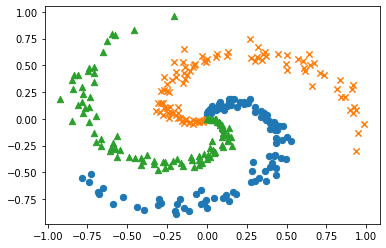

In [52]:
# 绘制数据点
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

输入是二维数据，类别数是 3。观察这个数据集可知，它不能被直线分割。

因此，我们需要学习非线性的分割线。

那么，我们的神经网络（具有使用非线性的 sigmoid 激活函数的隐藏层的神经网络）能否正确学习这种非线性模式呢？让我们实验一下。

### 神经网络的而实现

In [53]:
# ch01/two_layer_net.py

import numpy as np


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size): 
        # 初始化程序接收 3 个参数。input_size 是输入层的神经元数，
        # hidden_size 是隐藏层的神经元数，output_size 是输出层的神经元数。
        
        I, H, O = input_size, hidden_size, output_size

        # 初始化权重和偏置
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 生成层
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # 将所有的权重和偏置整理到列表中
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout


因为 Softmax with Loss 层和其他层的处理方式不同，所以不将它放入 layers列表中，而是单独存储在实例变量 loss_layer中。

### 学习用的代码

In [56]:
# train_custom_loop.py

# 设定超参数
max_epoch = 300 # 1 个 epoch 相当于模型“看过”一遍所有的学习数据（遍历数据集）。这里我们进行 300 个 epoch 的学习。
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [57]:
# 数据 模型 优化器
x, t = load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [58]:
# 学习用的变量
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [59]:
for epoch in range(max_epoch):
    # 打乱数据
    idx = np.random.permutation(data_size) # 在进行学习时，需要随机选择数据作为 mini-batch
    # 这里，我们以epoch 为单位打乱数据，对于打乱后的数据，按顺序从头开始抽取数据
  
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 计算梯度，更新参数
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期输出学习过程
        if (iters+1) % 10 == 0: #  10 次迭代计算 1 次平均损失，并将其添加到变量 loss_list 中。
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

| epoch 263 |  iter 10 / 10 | loss 0.12
| epoch 264 |  iter 10 / 10 | loss 0.13
| epoch 265 |  iter 10 / 10 | loss 0.12
| epoch 266 |  iter 10 / 10 | loss 0.12
| epoch 267 |  iter 10 / 10 | loss 0.12
| epoch 268 |  iter 10 / 10 | loss 0.12
| epoch 269 |  iter 10 / 10 | loss 0.11
| epoch 270 |  iter 10 / 10 | loss 0.12
| epoch 271 |  iter 10 / 10 | loss 0.12
| epoch 272 |  iter 10 / 10 | loss 0.12
| epoch 273 |  iter 10 / 10 | loss 0.12
| epoch 274 |  iter 10 / 10 | loss 0.12
| epoch 275 |  iter 10 / 10 | loss 0.11
| epoch 276 |  iter 10 / 10 | loss 0.12
| epoch 277 |  iter 10 / 10 | loss 0.12
| epoch 278 |  iter 10 / 10 | loss 0.11
| epoch 279 |  iter 10 / 10 | loss 0.11
| epoch 280 |  iter 10 / 10 | loss 0.11
| epoch 281 |  iter 10 / 10 | loss 0.11
| epoch 282 |  iter 10 / 10 | loss 0.12
| epoch 283 |  iter 10 / 10 | loss 0.11
| epoch 284 |  iter 10 / 10 | loss 0.11
| epoch 285 |  iter 10 / 10 | loss 0.11
| epoch 286 |  iter 10 / 10 | loss 0.11
| epoch 287 |  iter 10 / 10 | loss 0.11


数据的打乱（准确地说，是数据索引的打乱）使用 np.random.permutation() 方法。

给定参数 N，该方法可以返回 0 到 N − 1 的随机序列，其实际的使用示例如下所示

In [60]:
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

In [61]:
np.random.permutation(10)

array([3, 4, 2, 7, 8, 5, 6, 0, 9, 1])

绘制学习结果

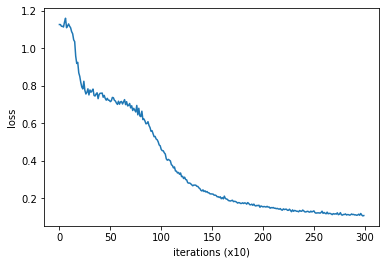

In [62]:
# 绘制学习结果
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

随着学习的进行，损失在减小。我们的神经网络正在朝着正确的方向学习！

下面试着绘制决策边界

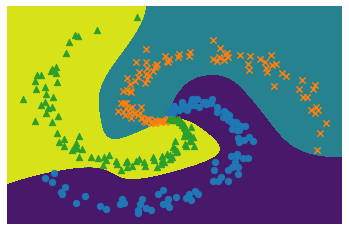

In [64]:
# 绘制决策边界
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 绘制数据点
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

学习后的神经网络可以正确地捕获“旋涡”这个模式。

也就说，模型正确地学习了非线性的区域划分。

像这样，神经网络通过隐藏层可以实现复杂的表现力。

深度学习的特征之一就是叠加的层越多，表现力越丰富。

### Trainer类

如前所述，本书中有很多机会执行神经网络的学习。

为此，就需要编写前面那样的学习用的代码。

然而，每次都写相同的代码太无聊了，因此我们将进行学习的类作为 Trainer 类提供出来。

Trainer 类的内部实现和刚才的源代码几乎相同，只是添加了一些新的功能而已，我们在需要的时候再详细说明其用法

In [ ]:
# common/trainer.py
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # 打乱
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 计算梯度，更新参数
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 将共享的权重整合为1个
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 评价
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

总之使用方法如下

In [67]:
# train.py
import sys
import sys
sys.path.append('../【源代码】深度学习进阶：自然语言处理')
from common.trainer import Trainer
import time
# 设定超参数
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [68]:
x, t = load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [69]:
trainer = Trainer(model, optimizer)

调用 fit() 方法开始学习

In [70]:
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

| epoch 209 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 210 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 211 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 212 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 213 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 214 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 215 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 216 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 217 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 218 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 219 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 220 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 221 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 222 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 223 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 224 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 225 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 226 |  iter 1 / 10 | time 0[s] | loss 0.12
| epoch 227 |  iter 1 / 10 | time 0[s] | loss 0.13
| epoch 228 |  iter 1 / 10 | ti

![](./img/表1-1.png)

Trainer 类有 plot() 方法，它将 fit() 方法记录的损失（准确地说，是按照 eval_interval 评价的平均损失）在图上画出来。

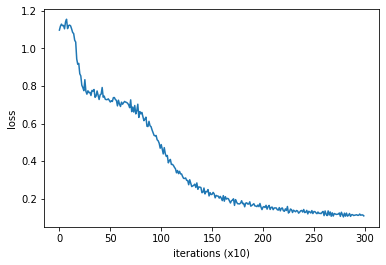

In [71]:
trainer.plot()

本书今后都将使用 Trainer 类进行学习

## 计算的高速化

神经网络的学习和推理需要大量的计算。

因此，如何高速地计算神经网络是一个重要课题。

本节将简单介绍一下可以有效加速神经网络的计算的位精度和 GPU 的相关内容。

相比计算的高速化，本书更加重视实现的易理解性。

但是，从计算的高速化的角度出发，之后进行的实现将考虑数据的位精度。

另外，在需要花费大量时间进行计算的地方，会将代码设计为可在 GPU上执行

### 位精度

NumPy 的浮点数默认使用 64 位的数据类型。

不过，是否为 64 位还依赖于具体的环境，包括操作系统、Python 和 NumPy 的版本等。

我们可以使用下面的代码来验证是否使用了 64 位浮点数

In [72]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

通过 NumPy 数组的实例变量 dtype，可以查看数据类型。

上面的结果是 float64，表示 64 位的浮点数

NumPy 中默认使用 64 位浮点数。

但是，我们已经知道使用 32 位浮点数也可以无损地（识别精度几乎不下降）进行神经网络的推理和学习。

从内存的角度来看，因为 32 位只有 64 位的一半，所以通常首选 32 位。

另外，在神经网络的计算中，数据传输的总线带宽有时会成为瓶颈。

在这种情况下，毫无疑问数据类型也是越小越好。

再者，就计算速度而言，32 位浮点数也能更高速地进行计算（浮点数的计算速度依赖于 CPU 或 GPU 的
架构）

因此，本书优先使用 32 位浮点数。

要在 NumPy 中使用 32 位浮点数，可以像下面这样将数据类型指定为 np.float32 或者 'f'。

In [73]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [74]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

另外，我们已经知道，如果只是神经网络的推理，则即使使用 16 位浮点数进行计算，精度也基本上不会下降 [6]。

不过，虽然 NumPy 中准备有16 位浮点数，但是普通 CPU 或 GPU 中的运算是用 32 位执行的。

因此，即便变换为 16 位浮点数，因为计算本身还是用 32 位浮点数执行的，所以处理速度方面并不能获得什么好处。

但是，如果是要（在外部文件中）保存学习好的权重，则 16 位浮点数是有用的。

具体地说，将权重数据用 16 位精度保存时，只需要 32 位时的一半容量。

因此，本书仅在保存学习好的权重时，将其变换为 16 位浮点数。

随着深度学习备受瞩目，最近的 GPU 已经开始支持 16 位半精度浮点数的存储与计算。

另外，谷歌公司设计了一款名为 TPU 的专用芯片，可以支持 8 位计算

### GPU（CuPy）

深度学习的计算由大量的乘法累加运算组成。

这些乘法累加运算的绝大部分可以并行计算，这是 GPU 比 CPU 擅长的地方。

因此，一般的深度学习框架都被设计为既可以在 CPU 上运行，也可以在 GPU 上运行。

本书中可以选用 Python 库 CuPy[3]。

CuPy 是基于 GPU 进行并行计算的库。

要使用 CuPy，需要使用安装有 NVIDIA 的 GPU 的机器，并且需要安装 CUDA 这个面向 GPU 的通用并行计算平台。

详细的安装方法请参考 CuPy 的官方安装文档 [4]

使用 Cupy，可以轻松地使用 NVIDIA 的 GPU 进行并行计算。

更重要的是，CuPy 和 NumPy 拥有共同的 API。

下面我们来看一个简单的使用示例。

#### 安装cupy

```
# For CUDA 8.0
pip install cupy-cuda80
 
# For CUDA 9.0
pip install cupy-cuda90
 
# For CUDA 9.1
pip install cupy-cuda91
 
# For CUDA 9.2
pip install cupy-cuda92
 
# For CUDA 10.0
pip install cupy-cuda100
 
# For CUDA 10.1
pip install cupy-cuda101
 
# Install CuPy from source
```


查看cuda版本

打开cmd输入 nvcc --version

![](./img/图1-35.png)

In [2]:
!pip install cupy==7.0

Looking in indexes: http://pypi.douban.com/simple


    ERROR: Command errored out with exit status 1:
     command: 'd:\anaconda\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Huawei\\AppData\\Local\\Temp\\pip-install-2aonbvo6\\cupy\\setup.py'"'"'; __file__='"'"'C:\\Users\\Huawei\\AppData\\Local\\Temp\\pip-install-2aonbvo6\\cupy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Huawei\AppData\Local\Temp\pip-pip-egg-info-9v65lao1'
         cwd: C:\Users\Huawei\AppData\Local\Temp\pip-install-2aonbvo6\cupy\
    Complete output (43 lines):
    Options: {'package_name': 'cupy', 'long_description': None, 'wheel_libs': [], 'wheel_includes': [], 'no_rpath': False, 'profile': False, 'linetrace': False, 'annotate': False, 'no_cuda': False, 'use_hip': False}
    
    -------- Configuring Module: cuda --------
    Microsoft Visual C++ 14.0 is required. Get it wi

In [1]:
import cupy as cp
x = cp.arange(6).reshape(2, 3).astype('f')
x

ImportError: CuPy is not correctly installed.

If you are using wheel distribution (cupy-cudaXX), make sure that the version of CuPy you installed matches with the version of CUDA on your host.
Also, confirm that only one CuPy package is installed:
  $ pip freeze

If you are building CuPy from source, please check your environment, uninstall CuPy and reinstall it with:
  $ pip install cupy --no-cache-dir -vvvv

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

original error: cannot import name 'get_nvcc_path' from 'cupy._environment' (D:\anaconda\lib\site-packages\cupy\_environment.py)

In [6]:
!pip freeze

absl-py==0.10.0
anaconda-client==1.7.2
anaconda-navigator==1.9.12
appdirs==1.4.3
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
backcall==0.1.0
baostock==0.8.8
beautifulsoup4==4.9.1
bleach==3.1.4
blis==0.2.4
bokeh @ file:///C:/ci/bokeh_1593179283802/work
boto==2.49.0
boto3==1.14.60
botocore==1.17.60
Bottleneck==1.3.2
branca==0.3.1
cachetools==3.1.1
catalogue==1.0.0
certifi==2020.11.8
cffi==1.14.0
chardet==3.0.4
ci-info==0.2.0
click==7.1.2
cloudpickle @ file:///home/conda/feedstock_root/build_artifacts/cloudpickle_1588164361239/work
clyent==1.2.2
color==0.1
colorama==0.4.3
colorlover==0.3.0
colorspacious==1.1.2
colour==0.1.5
conda==4.8.3
conda-build==3.17.8
conda-package-handling==1.7.0
conda-verify==3.1.1
configparser==4.0.2
cryptography==2.9.2
cufflinks==0.16
cupy-cuda100==8.2.0
cycler==0.10.0


cymem==2.0.2
Cython==0.29.14
cytoolz==0.10.1
dask @ file:///tmp/build/80754af9/dask-core_1592842333140/work
data==0.4
decorator==4.4.2
defusedxml==0.6.0
dill @ file:///tmp/build/80754af9/dill_1593202311028/work
distributed @ file:///C:/ci/distributed_1592842563762/work
docutils==0.15.2
dukpy==0.2.2
en-core-web-sm==2.1.0
entrypoints==0.3
enum34==1.1.9
et-xmlfile==1.0.1
etelemetry==0.2.2
fast-histogram==0.9
fastrlock==0.5
ffmpeg==1.4
filelock==3.0.12
Flask==1.1.2
folium==0.10.0
fsspec==0.7.4
funcsigs==1.0.2
future==0.18.2
fxcmpy==1.2.5
gast==0.3.3
gensim==3.8.3
ghostscript==0.6
glob2==0.7
glue-core==0.15.6
glue-vispy-viewers==0.12.2
glueviz==0.15.2
google-auth==1.11.2
google-auth-oauthlib==0.4.1
google-pasta==0.1.8
graphviz==0.13.2
grpcio==1.27.2
gym==0.17.1
h5py==2.10.0
HeapDict==1.0.1
idna==2.9
imagecodecs-lite @ file:///D:/bld/imagecodecs-lite_1591047470868/work
imageio==2.8.0
imageio-ffmpeg==0.3.0
imbalanced-learn==0.6.2
imblearn==0.0
importlib-metadata==1.6.0
ipykernel==5.1.4
ipytho

In [5]:
 x.sum(axis=1)

array([ 3., 12.], dtype=float32)

如上所示，CuPy 的使用方法与 NumPy 基本相同。

另外，它的内部使用 GPU 进行计算。

这意味着使用 NumPy 写的代码可以轻松地改成“GPU版”，因为我们要做的（基本上）只是把 numpy 替换为 cupy 而已。

截至 2018 年 6 月，CuPy 并没有完全覆盖 NumPy 的方法。

虽然CuPy 和 NumPy 并不完全兼容，但是它们有许多共同的 API。

重申一下，本书为了使代码实现易于理解，基本上都基于 CPU 进行实现。

对于计算上要耗费大量时间的代码，则提供使用了 CuPy 的实现（可选）。

不过，即便在使用 CuPy 的情况下，也会尽量做到不让读者感到是在使用 CuPy。

本书中可以在 GPU 上运行的代码最先出现在第 4 章（ch04/train.py）。

这个 ch04/train.py 从以下的 import 语句开始。

In [ ]:
import sys
sys.path.append('..')
import numpy as np
from common import config
# 在用GPU运行时，请打开下面的注释（需要cupy）
# ===============================================
# config.GPU = True
# ===============================================
...

用 CPU 执行上述代码需要花费几个小时，但是如果使用 GPU，则只需要几十分钟。并且，只要修改上述源代码中的一行，本书提供的代码就可以在 GPU 模式下运行。

具体而言，只需打开注释 # config.GPU = True，并用 CuPy 代替 NumPy 即可。如此，代码就可以在 GPU 上运行，并高速地进行学习。

In [ ]:
# common.config.py
# coding: utf-8

GPU = False

In [ ]:
# common.np.py
# coding: utf-8
from common.config import GPU


if GPU:
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else:
    import numpy as np

In [ ]:
# common.layers.py

from common.np import *  # import numpy as np
from common.config import GPU
from common.functions import softmax, cross_entropy_error

## 小结